In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('placement.csv')

In [6]:
df.sample(5)

,cgpa,placement_exam_marks,placed
340,7.45,51.0,0
502,7.18,50.0,1
474,7.11,25.0,1
942,7.03,6.0,0
966,6.24,72.0,1


In [8]:
df.shape

(1000, 3)

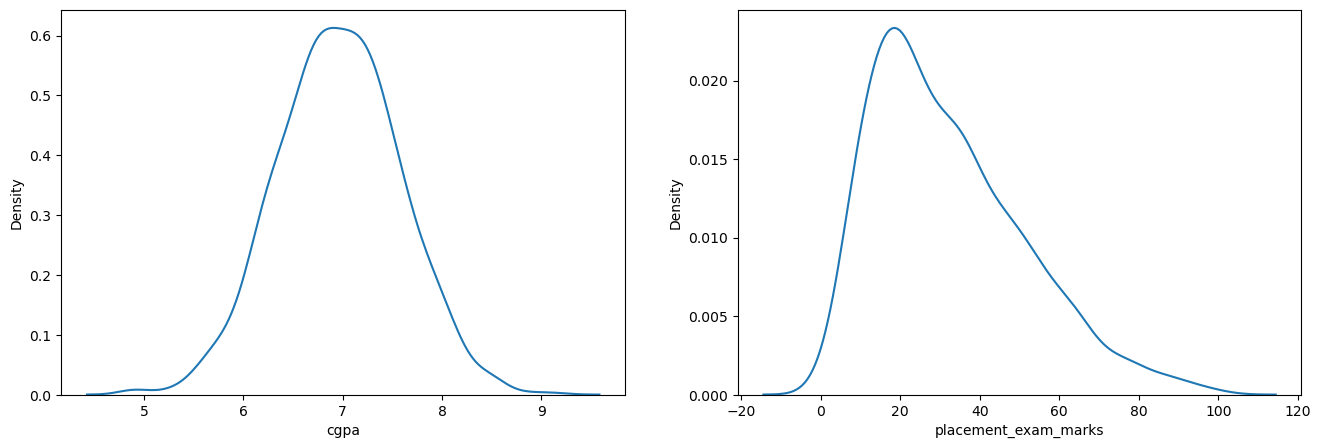

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])

plt.show()

You can also calculate it using **skew** method of *pandas*.

In [19]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [21]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

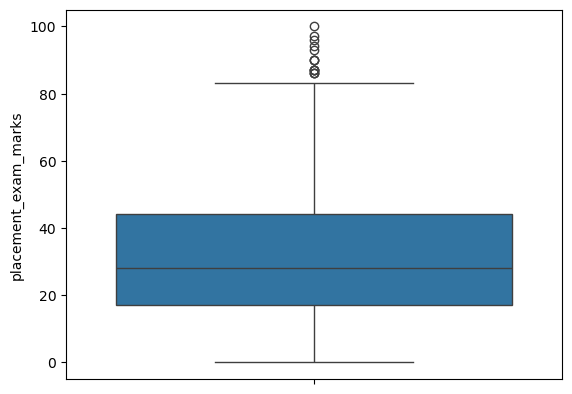

In [23]:
sns.boxplot(df['placement_exam_marks'])

In [25]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [27]:
percentile75

44.0

In [29]:
percentile25

17.0

In [31]:
iqr = percentile75 - percentile25

In [33]:
iqr

27.0

In [35]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [37]:
print("Upper Limit: ", upper_limit)
print("Lower Limit: ", lower_limit)

Upper Limit:  84.5
Lower Limit:  -23.5


## Finding Outliers

In [40]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [42]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


## Trimming

Let's do trimming first!

In [46]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [50]:
new_df.shape

(985, 3)

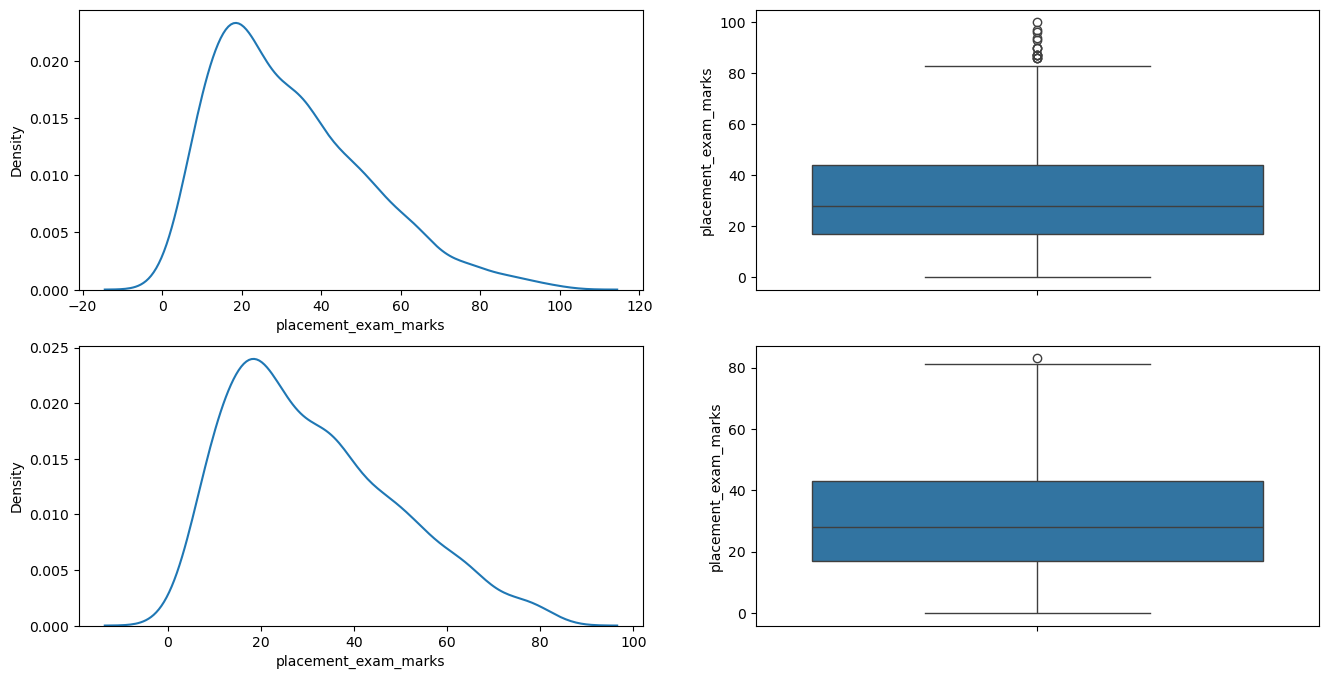

In [60]:
# comparing
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

## Capping

In [69]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [77]:
new_df_cap.shape

(1000, 3)

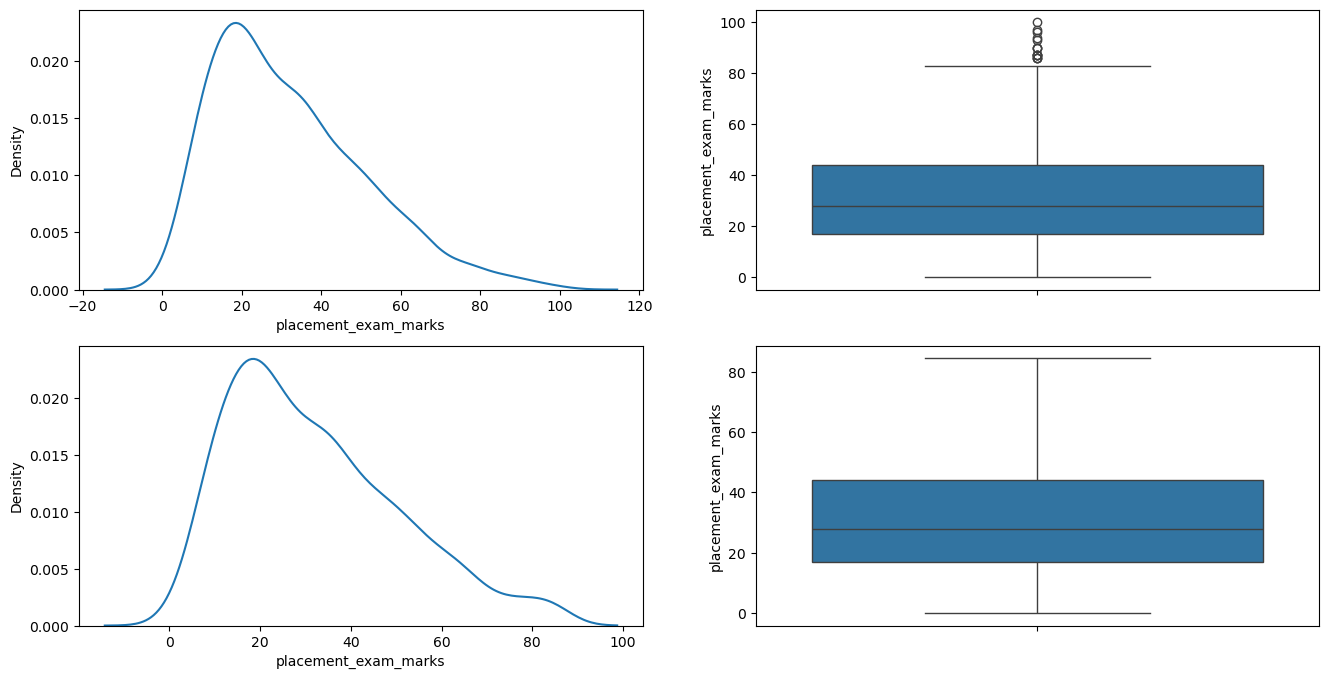

In [79]:
# Comparing

plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()